[[    1     1     1     1     0]
 [    1     2     1     4     0]
 [    1     3     1     9     0]
 ...
 [  200   198 40000 39204     0]
 [  200   199 40000 39601     0]
 [  200   200 40000 40000     0]]


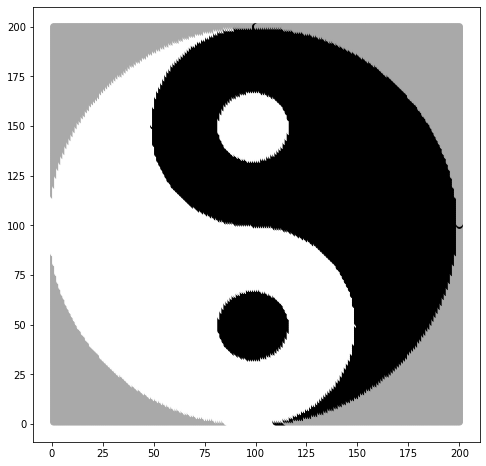

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib

df = pd.read_csv("太極.csv")
df.columns = ["x1", 'x2','label']
df["x1^2"] = df["x1"]**2
df["x2^2"] = df["x2"]**2

data =df[["x1","x2","x1^2","x2^2","label"]].values
print(data)
data.shape

colors = ['darkgrey','white','black']
fig = plt.figure(figsize=(8,8))
plt.scatter(df['x1'],df['x2'],c = df['label'],cmap=matplotlib.colors.ListedColormap(colors))

In [5]:
train_data, test_data = train_test_split(data, random_state=777, train_size=0.8)
#train_data,test_data
x_train, x_test = train_data[:,[0,1,2,3]].astype(np.float32), test_data[:,[0,1,2,3]].astype(np.float32)
y_train, y_test = train_data[:,[4]].astype(np.float32), test_data[:,[4]].astype(np.float32)
#x_train, x_test, y_train, y_test
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

model = Sequential() #Building ANN Model
model.add(Dense(4, input_shape=(4,))) 
model.add(Dense(16, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(16, activation="relu")) 
model.add(Dense(16, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

1000/1000 [==============================] - 3s 3ms/step - loss: 0.2632 - accuracy: 0.8916
訓練資料集的準確度 = 0.89
250/250 [==============================] - 1s 3ms/step - loss: 0.2742 - accuracy: 0.8875
測試資料集的準確度 = 0.89


C:\Users\OwO\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


400/400 [==============================] - 1s 1ms/step


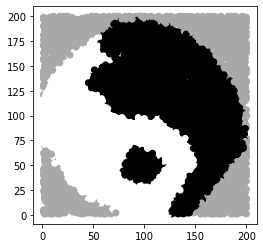

In [6]:
history = model.fit(x_train,Y_train, epochs = 35, batch_size = 20, verbose = 0, validation_data = (x_test, Y_test))
loss, accuracy = model.evaluate(x_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

y_pred = model.predict_classes(x_test, batch_size = 20, verbose = 1)

colors = ['darkgrey','white','black']
fig = plt.figure(figsize=(4,4))
plt.scatter(x_test[:,0],x_test[:,1],c = y_pred,cmap=matplotlib.colors.ListedColormap(colors))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 695
Trainable params: 695
Non-trainable params: 0
_________________________________________________________________


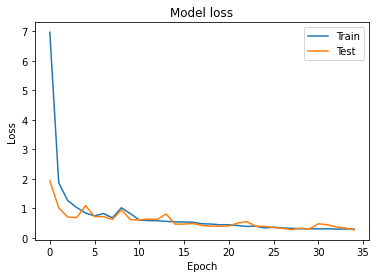

In [8]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    
plot_loss(history.history['loss'], history.history['val_loss'])

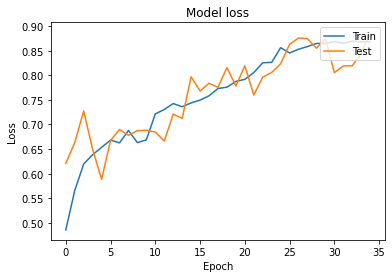

In [9]:
def plot_acc(loss,val_loss):
    plt.figure()
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plt.title('Model acc')
    plt.ylabel('Acc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    
plot_loss(history.history['accuracy'], history.history['val_accuracy'])